In [13]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [21]:
def read_angles(file_path):
    
    with open(file_path) as fp:
        
        angles_dataset = [list(map(float, line.strip().split('\t'))) for line in fp]
        angles = [angle for angles_list in angles_dataset for angle in angles_list]
        
    labeled_angles = sort_targets_into_labels(angles)
    
    return labeled_angles

In [15]:
def read_spikes(file_path):
    
    spikes_dataset = np.loadtxt(file_path)
    spikes = spikes_dataset.T
    
    return spikes

In [16]:
def sort_targets_into_labels(angles):
    
    labelled_targets = []
    
    for angle in angles:
        
        if(angle >= 0) and (angle <90):
            angle_label = '0 to 90'
        if(angle >= 90) and (angle <180):
            angle_label = '90 to 180'
        if(angle >= 180) and (angle < 270):
            angle_label = '180 to 270'
        if(angle >= 270) and (angle < 360):
            angle_label = '270 to 360'
        
        labelled_targets.append(angle_label)
        
    return labelled_targets

In [32]:
def plot_accuracies(accuracies):
    
    k_neighbours = np.arange(1,301)
    percentile_accuracies = np.multiply(accuracies, 100)
    
    plt.plot(k_neighbours, percentile_accuracies, color='gold')
    plt.title('Accuracies VS Number of Neighbours')
    plt.xlabel('K Value')
    plt.ylabel('Accuracy')

    
    plt.savefig('Testing Classification Accuracies')

In [23]:
def compute_accuracies(training_spikes, training_labels, testing_spikes, testing_labels):
    
    classifier_accuracies = []

    for k in range(1, 301):

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(training_spikes, training_labels)
        
        predicted_angles = knn.predict(testing_spikes)

        accuracy = accuracy_score(testing_labels, predicted_angles)
        classifier_accuracies.append(accuracy)
        
    return classifier_accuracies

## Deliverables

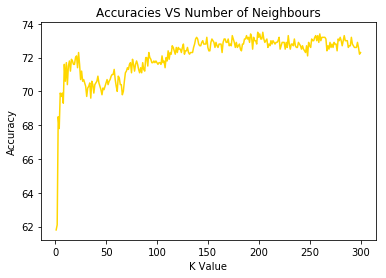

In [34]:
training_spikes = read_spikes('Training_SpikeTrains.txt')
training_labels = read_angles('Angle_Training.txt')

testing_spikes = read_spikes('Testing_SpikeTrains.txt')
testing_labels = read_angles('Angle_Testing.txt')

classifier_accuracies = compute_accuracies(training_spikes, training_labels, testing_spikes, testing_labels)

plot_accuracies(classifier_accuracies)